# Exercícios:


## 1 - Importe o arquivo "dataframe_exercicio_modulo_7.csv" em um dataframe - df - do Pandas.

In [1225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [1226]:
df = pd.read_csv("dataframe_exercicio_modulo_7.csv")
df.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN


## 2 - Quais as dimensões do dataframe?

In [1227]:
tamanho = df.size # Tamanho do Dataframe
corpo = df.shape # Corpo do Dataframe

# Printing tamanho e corpo
print(f'Tamanho do Dataframe (Linhas X Colunas) = {size} \n\nCorpodo Dataframe: \n    Linhas = {shape[0]} \n    Colunas = {shape[1]}')

Tamanho do Dataframe (Linhas X Colunas) = 262530 

Corpodo Dataframe: 
    Linhas = 29170 
    Colunas = 9


## 3 - Qual o tipo das variáveis?

In [1228]:
df.dtypes

idade               float64
tempo_educacao        int64
estado_civil         object
cor                  object
sexo                 object
horas_por_semana      int64
salario_anual        object
nome                float64
dívida              float64
dtype: object

## 4 - Existem variáveis faltantes no dataset? Quais?

In [1229]:
# Quantas linhas vazias coném nas colunas 
df.isnull().sum()

idade                  99
tempo_educacao          0
estado_civil            0
cor                     0
sexo                    0
horas_por_semana        0
salario_anual           0
nome                29170
dívida              29170
dtype: int64

In [1230]:
# Em porcentagem
((df.isnull().sum() / df.shape[0]) * 100).round(2)

idade                 0.34
tempo_educacao        0.00
estado_civil          0.00
cor                   0.00
sexo                  0.00
horas_por_semana      0.00
salario_anual         0.00
nome                100.00
dívida              100.00
dtype: float64

## 5 - Exiba todas as categorias das variáveis 'estado_civil', 'cor' e 'sexo'. Você consegue detectar algum problema?

In [1231]:
df_categorias = df[['estado_civil', 'cor', 'sexo']]
df_categorias

,estado_civil,cor,sexo
0,Never-married,White,Male
1,Married-civ-spouse,White,Male
2,Divorced,White,Male
3,Married-civ-spouse,Black,Male
4,Married-civ-spouse,White,Female
...,...,...,...
29165,Married-civ-spouse,White,Female
29166,Married-civ-spouse,White,Male
29167,Widowed,White,Female
29168,Never-married,White,Male


In [1232]:
# Contar os tipos de dados existentes em cada coluna
df_categorias.dtypes.value_counts()

object    3
dtype: int64

In [1233]:
# Analisar se existe valores ausentes
df_categorias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29170 entries, 0 to 29169
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   estado_civil  29170 non-null  object
 1   cor           29170 non-null  object
 2   sexo          29170 non-null  object
dtypes: object(3)
memory usage: 683.8+ KB


In [1234]:
df_categorias.describe()

,estado_civil,cor,sexo
count,29170,29170,29170
unique,7,5,3
top,Married-civ-spouse,White,Male
freq,13368,25621,18181


In [1235]:
# Analisar os dados unicos da categoria estado_civil
df.estado_civil.value_counts()

Married-civ-spouse       13368
Never-married             9579
Divorced                  4162
Widowed                    902
Separated                  883
Married-spouse-absent      253
Married-AF-spouse           23
Name: estado_civil, dtype: int64

In [1236]:
# Analisar os dados unicos da categoria cor
df.cor.value_counts()

White                 25621
Black                  2832
Amer-Indian-Eskimo      296
Asian-Pac-Islander      292
Other                   129
Name: cor, dtype: int64

In [1237]:
# Analisar os dados unicos da categoria sexo
df.sexo.value_counts()

Male      18181
Female     9052
?          1937
Name: sexo, dtype: int64

### Resumo de Análise:

- estado_civil: Foram detectados linhas com valores preenchidos com **'Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent'**. Estes valores podem dificultar (dependendo da análise), se precisarmos ter uma respostas mais específica. Poderiam ser definidor como um único perfil 'Married', sefor preciso, para ter um grupo mais consolidado ou excluír as linhas (caso não seja um volume de grande impacto).

- cor: Foram detectados linhas com valores preenchidos com **Other**. Poderia neste caso, analisar a porcentagem e fazer um preenchimento pela moda.

- sexo: Foram detecctados linhas com valores preenchidos com **?**. Provavelmente simbolizando por um dado não capturado ou desconhecido para a ctegoria sexo. Poderia neste caso, também analisar a porcentagem e fazer um preenchimento pela moda.

Obs.: Por último caso também poderia excluír as linhas (caso estejam no mesmo  eixo x e não seja um volume de grande impacto).

## 6 - Faça um tratamento nas variáveis faltantes.

In [1238]:
# Rertirar as colunas que contém valores faltantes = 80%(NA)

dff = df.copy()
dff.drop(columns=['nome', 'dívida'], inplace=True)
dff = dff.dropna()
dff

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual
0,39.0,13,Never-married,White,Male,40,<=50K
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K
2,38.0,9,Divorced,White,Male,40,<=50K
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K
...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K
29167,58.0,9,Widowed,White,Female,40,<=50K
29168,22.0,9,Never-married,White,Male,20,<=50K


In [1239]:
# Quantas linhas vazias coném nas colunas 
dff.isnull().sum()

idade               0
tempo_educacao      0
estado_civil        0
cor                 0
sexo                0
horas_por_semana    0
salario_anual       0
dtype: int64

## 7 - Aplique uma transformação "MinMax" na variável  'tempo_educacao' e uma transformação "StandardScaler" na variável 'horas_por_semana'.

Informações ~ Tempo Educação:

count    29071.000000
mean        10.170170
std          2.395696
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: tempo_educacao, dtype: float64


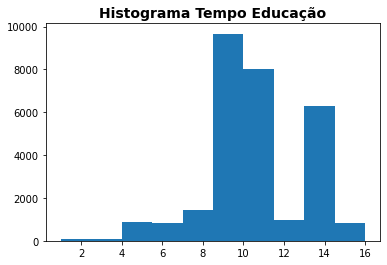

In [1240]:
print("Informações ~ Tempo Educação:\n")
print(dff.tempo_educacao.describe())

plt.title("Histograma Tempo Educação", fontsize = 14, fontweight = 'bold')
plt.hist(dff.tempo_educacao)
plt.show()

In [1241]:
mm_scaler = MinMaxScaler()
ss_scaler = StandardScaler()

In [1242]:
X = dff.tempo_educacao.values.reshape(-1,1)
X

array([[13],
       [13],
       [ 9],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=int64)

In [1243]:
mm_scaler.fit(X)

MinMaxScaler()

In [1244]:
ss_scaler.fit(X)

StandardScaler()

In [1245]:
mm_scaler.transform(X)

array([[0.8       ],
       [0.8       ],
       [0.53333333],
       ...,
       [0.53333333],
       [0.53333333],
       [0.53333333]])

In [1246]:
ss_scaler.transform(X)

array([[ 1.18123465],
       [ 1.18123465],
       [-0.48845502],
       ...,
       [-0.48845502],
       [-0.48845502],
       [-0.48845502]])

In [1247]:
pd.DataFrame(np.c_[dff.tempo_educacao.values, mm_scaler.transform(X), ss_scaler.transform(X)]).round(2)

,0,1,2
0,13.0,0.80,1.18
1,13.0,0.80,1.18
2,9.0,0.53,-0.49
3,7.0,0.40,-1.32
4,14.0,0.87,1.60
...,...,...,...
29066,12.0,0.73,0.76
29067,9.0,0.53,-0.49
29068,9.0,0.53,-0.49
29069,9.0,0.53,-0.49


## 8 - Aplique ohe-hot-encoding nas variáveis 'estado_civil', 'cor' e 'sexo'.

In [1248]:
ohe_estado_civil = OneHotEncoder()
ohe_cor = OneHotEncoder()
ohe_sexo = OneHotEncoder()

In [1249]:
estado_civil_ohe = dff.estado_civil.values.reshape(-1,1)
cor_ohe = dff.cor.values.reshape(-1,1)
sexo_ohe = dff.sexo.values.reshape(-1,1)

ohe_estado_civil.fit(estado_civil_ohe)
ohe_cor.fit(cor_ohe)
ohe_sexo.fit(sexo_ohe)

OneHotEncoder()

In [1250]:
ohe_estado_civil.transform(estado_civil_ohe)
ohe_cor.transform(cor_ohe)
ohe_sexo.transform(sexo_ohe)

<29071x3 sparse matrix of type '<class 'numpy.float64'>'
	with 29071 stored elements in Compressed Sparse Row format>

In [1251]:
ohe_estado_civil.transform(estado_civil_ohe).toarray()
ohe_cor.transform(cor_ohe).toarray()
ohe_sexo.transform(sexo_ohe).toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [1252]:
ohe_estado_civil.categories_
ohe_cor.categories_
ohe_sexo.categories_

[array(['?', 'Female', 'Male'], dtype=object)]

In [1253]:
dataframe_estado_civil_OHE = pd.DataFrame(ohe_estado_civil.transform(estado_civil_ohe).toarray(), 
                             columns = ohe_estado_civil.categories_[0].tolist())
dataframe_cor_OHE = pd.DataFrame(ohe_cor.transform(cor_ohe).toarray(), 
                             columns = ohe_cor.categories_[0].tolist())
dataframe_sexo_OHE = pd.DataFrame(ohe_sexo.transform(sexo_ohe).toarray(), 
                             columns = ohe_sexo.categories_[0].tolist())
dataframe_estado_civil_OHE
dataframe_cor_OHE
dataframe_sexo_OHE

,?,Female,Male
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
29066,0.0,1.0,0.0
29067,0.0,0.0,1.0
29068,0.0,1.0,0.0
29069,0.0,0.0,1.0


In [1254]:
#agrupando no dataset - para comparar os resultados

dff_concat = pd.concat([dff, dataframe_estado_civil_OHE,dataframe_cor_OHE,dataframe_sexo_OHE], axis = 1)
dff_concat

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,...,Separated,Widowed,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,?,Female,Male
0,39.0,13.0,Never-married,White,Male,40.0,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,50.0,13.0,Married-civ-spouse,White,Male,13.0,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,38.0,9.0,Divorced,White,Male,40.0,<=50K,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,53.0,7.0,Married-civ-spouse,Black,Male,40.0,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,37.0,14.0,Married-civ-spouse,White,Female,40.0,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
27778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
27878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
27883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [1255]:
dff_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29170 entries, 0 to 28326
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   idade                  29071 non-null  float64
 1   tempo_educacao         29071 non-null  float64
 2   estado_civil           29071 non-null  object 
 3   cor                    29071 non-null  object 
 4   sexo                   29071 non-null  object 
 5   horas_por_semana       29071 non-null  float64
 6   salario_anual          29071 non-null  object 
 7   Divorced               29071 non-null  float64
 8   Married-AF-spouse      29071 non-null  float64
 9   Married-civ-spouse     29071 non-null  float64
 10  Married-spouse-absent  29071 non-null  float64
 11  Never-married          29071 non-null  float64
 12  Separated              29071 non-null  float64
 13  Widowed                29071 non-null  float64
 14  Amer-Indian-Eskimo     29071 non-null  float64
 15  As

In [1265]:
dff_concat = dff_concat[['idade', 
                         'tempo_educacao', 
                         'horas_por_semana', 
                         'salario_anual',
                         'estado_civil',
                         'Divorced',
                         'Married-AF-spouse',
                         'Married-civ-spouse',
                         'Married-spouse-absent',
                         'Never-married',
                         'Separated',
                         'Widowed',
                         'cor',
                         'Amer-Indian-Eskimo',
                         'Asian-Pac-Islander',
                         'Black',
                         'White',
                         'Other',
                         'sexo',
                         'Female',
                         'Male',
                         '?',]]

dff_concat = dff_concat.dropna()
dff_concat

,idade,tempo_educacao,horas_por_semana,salario_anual,estado_civil,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,...,cor,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,White,Other,sexo,Female,Male,?
0,39.0,13.0,40.0,<=50K,Never-married,0.0,0.0,0.0,0.0,1.0,...,White,0.0,0.0,0.0,1.0,0.0,Male,0.0,1.0,0.0
1,50.0,13.0,13.0,<=50K,Married-civ-spouse,0.0,0.0,1.0,0.0,0.0,...,White,0.0,0.0,0.0,1.0,0.0,Male,0.0,1.0,0.0
2,38.0,9.0,40.0,<=50K,Divorced,1.0,0.0,0.0,0.0,0.0,...,White,0.0,0.0,0.0,1.0,0.0,Male,0.0,1.0,0.0
3,53.0,7.0,40.0,<=50K,Married-civ-spouse,0.0,0.0,1.0,0.0,0.0,...,Black,0.0,0.0,1.0,0.0,0.0,Male,0.0,1.0,0.0
4,37.0,14.0,40.0,<=50K,Married-civ-spouse,0.0,0.0,1.0,0.0,0.0,...,White,0.0,0.0,0.0,1.0,0.0,Female,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29066,53.0,9.0,38.0,<=50K,Widowed,0.0,0.0,1.0,0.0,0.0,...,Black,0.0,0.0,0.0,1.0,0.0,Female,1.0,0.0,0.0
29067,17.0,6.0,20.0,<=50K,Never-married,0.0,0.0,1.0,0.0,0.0,...,White,0.0,0.0,0.0,1.0,0.0,Male,0.0,1.0,0.0
29068,61.0,4.0,40.0,<=50K,Married-civ-spouse,0.0,0.0,0.0,0.0,0.0,...,White,0.0,0.0,0.0,1.0,0.0,Male,1.0,0.0,0.0
29069,38.0,5.0,40.0,<=50K,Married-civ-spouse,0.0,0.0,0.0,0.0,1.0,...,Black,0.0,0.0,0.0,1.0,0.0,Male,0.0,1.0,0.0


## 9 - Detecte e elimine os outliers da variável 'idade'.

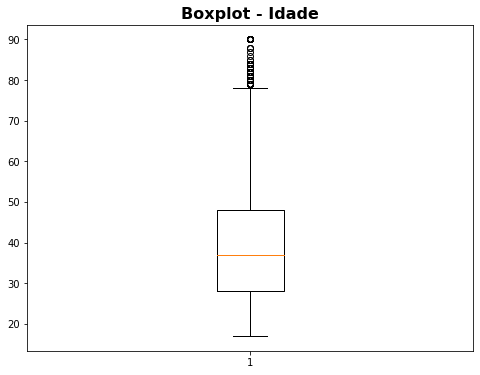

In [1266]:
plt.figure(figsize=[8,6])
plt.title("Boxplot - Idade", fontsize = 16, fontweight = 'bold')
plt.boxplot(dff_concat.idade)
plt.show()

In [1267]:
def detecta_outlier_idade(x, limite = 1.5):
    iqr_idade = np.percentile(x, 75) - np.percentile(x, 25)
    limite_inf_idade = np.maximum(np.percentile(x, 25) - limite * iqr_idade, np.min(x))
    limite_sup_idade = np.minimum(np.percentile(x, 75) + limite * iqr_idade, np.max(x))
    return np.where((x < limite_inf_idade) | (x > limite_sup_idade), 1, 0)

In [1268]:
dff_concat['outlier_idade'] = detecta_outlier_idade(dff_concat.idade)

In [1272]:
index_outlier_idade = dff_concat[ (dff_concat['outlier_idade'] == 1) ].index
dff_concat.drop(index_outlier_idade, inplace = True)
dff_concat

,idade,tempo_educacao,horas_por_semana,salario_anual,estado_civil,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,...,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,White,Other,sexo,Female,Male,?,outlier_idade
0,39.0,13.0,40.0,<=50K,Never-married,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,Male,0.0,1.0,0.0,0
1,50.0,13.0,13.0,<=50K,Married-civ-spouse,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,Male,0.0,1.0,0.0,0
2,38.0,9.0,40.0,<=50K,Divorced,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,Male,0.0,1.0,0.0,0
3,53.0,7.0,40.0,<=50K,Married-civ-spouse,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,Male,0.0,1.0,0.0,0
4,37.0,14.0,40.0,<=50K,Married-civ-spouse,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,Female,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29066,53.0,9.0,38.0,<=50K,Widowed,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,Female,1.0,0.0,0.0,0
29067,17.0,6.0,20.0,<=50K,Never-married,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,Male,0.0,1.0,0.0,0
29068,61.0,4.0,40.0,<=50K,Married-civ-spouse,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,Male,1.0,0.0,0.0,0
29069,38.0,5.0,40.0,<=50K,Married-civ-spouse,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,Male,0.0,1.0,0.0,0


## 10 - Escreva uma função que receba o dataframe em sua forma original e retorne o dataframe modificado, após todas as transformações dos itens acima.

In [1275]:
def pre_processamento_df(dataframe):
    
    #Faz cópia do dataframe original
    my_df = dataframe.copy()
    
    #Trata as categorias vazias
    my_df.drop(columns=['nome', 'dívida'], inplace=True)
    my_df = my_df.dropna()
    
    #Aplica OHE(ohe-hot-encoding)
    ohe_estado_civil = OneHotEncoder()
    ohe_cor = OneHotEncoder()
    ohe_sexo = OneHotEncoder()

    estado_civil_ohe = my_df.estado_civil.values.reshape(-1,1)
    cor_ohe = my_df.cor.values.reshape(-1,1)
    sexo_ohe = my_df.sexo.values.reshape(-1,1)

    ohe_estado_civil.fit(estado_civil_ohe)
    ohe_cor.fit(cor_ohe)
    ohe_sexo.fit(sexo_ohe)

    ohe_estado_civil.transform(estado_civil_ohe)
    ohe_cor.transform(cor_ohe)
    ohe_sexo.transform(sexo_ohe)

    ohe_estado_civil.transform(estado_civil_ohe).toarray()
    ohe_cor.transform(cor_ohe).toarray()
    ohe_sexo.transform(sexo_ohe).toarray()

    ohe_estado_civil.categories_
    ohe_cor.categories_
    ohe_sexo.categories_

    dataframe_estado_civil_OHE = pd.DataFrame(ohe_estado_civil.transform(estado_civil_ohe).toarray(), columns = ohe_estado_civil.categories_[0].tolist())
    dataframe_cor_OHE = pd.DataFrame(ohe_cor.transform(cor_ohe).toarray(), columns = ohe_cor.categories_[0].tolist())
    dataframe_sexo_OHE = pd.DataFrame(ohe_sexo.transform(sexo_ohe).toarray(), columns = ohe_sexo.categories_[0].tolist())

    dataframe_estado_civil_OHE
    dataframe_cor_OHE
    dataframe_sexo_OHE

    my_df_concat = pd.concat([my_df, dataframe_estado_civil_OHE, dataframe_cor_OHE, dataframe_sexo_OHE], axis = 1)

    #Organiza o Dataframe
    my_df_concat = my_df_concat[['idade', 
                         'tempo_educacao', 
                         'horas_por_semana', 
                         'salario_anual',
                         'estado_civil',
                         'Divorced',
                         'Married-AF-spouse',
                         'Married-civ-spouse',
                         'Married-spouse-absent',
                         'Never-married',
                         'Separated',
                         'Widowed',
                         'cor',
                         'Amer-Indian-Eskimo',
                         'Asian-Pac-Islander',
                         'Black',
                         'White',
                         'Other',
                         'sexo',
                         'Female',
                         'Male',
                         '?',]]
    
    my_df_concat = my_df_concat.dropna()
        
    #Detecta Outlier
    def detecta_outlier_idade(x, limite = 1.5):
        iqr_idade = np.percentile(x, 75) - np.percentile(x, 25)
        limite_inf_idade = np.maximum(np.percentile(x, 25) - limite * iqr_idade, np.min(x))
        limite_sup_idade = np.minimum(np.percentile(x, 75) + limite * iqr_idade, np.max(x))
        return np.where((x < limite_inf_idade) | (x > limite_sup_idade), 1, 0)

    my_df_concat['outlier_idade'] = detecta_outlier_idade(my_df_concat.idade)
    
    #Elimina linhas com NaN
    my_df_concat = my_df_concat.dropna()
    
    #Elimina linhas identificadas como Outliers
    index_outlier_idade = my_df_concat[ (my_df_concat['outlier_idade'] == 1) ].index
    my_df_concat.drop(index_outlier_idade, inplace = True)
    
    return my_df_concat

In [1276]:
df = pd.read_csv("dataframe_exercicio_modulo_7.csv")
pre_processamento_df(df)

,idade,tempo_educacao,horas_por_semana,salario_anual,estado_civil,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,...,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,White,Other,sexo,Female,Male,?,outlier_idade
0,39.0,13.0,40.0,<=50K,Never-married,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,Male,0.0,1.0,0.0,0
1,50.0,13.0,13.0,<=50K,Married-civ-spouse,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,Male,0.0,1.0,0.0,0
2,38.0,9.0,40.0,<=50K,Divorced,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,Male,0.0,1.0,0.0,0
3,53.0,7.0,40.0,<=50K,Married-civ-spouse,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,Male,0.0,1.0,0.0,0
4,37.0,14.0,40.0,<=50K,Married-civ-spouse,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,Female,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29066,53.0,9.0,38.0,<=50K,Widowed,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,Female,1.0,0.0,0.0,0
29067,17.0,6.0,20.0,<=50K,Never-married,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,Male,0.0,1.0,0.0,0
29068,61.0,4.0,40.0,<=50K,Married-civ-spouse,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,Male,1.0,0.0,0.0,0
29069,38.0,5.0,40.0,<=50K,Married-civ-spouse,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,Male,0.0,1.0,0.0,0
